In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle   
from preprocess import *  
from imblearn.over_sampling import SMOTE 

In [2]:
data=pd.read_csv('loan_approved.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [6]:
data['Gender'].isnull()==True

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Gender, Length: 614, dtype: bool

In [7]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [8]:
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [9]:
data['Gender'].isnull().value_counts()

Gender
False    614
Name: count, dtype: int64

In [10]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [11]:
data.loc[data['Married'].isnull()==True,'Married']='Yes'

In [12]:
data['Married'].isnull().value_counts()

Married
False    614
Name: count, dtype: int64

In [13]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
data.loc[data['Dependents'].isnull()==True,'Dependents']='0'

In [15]:
data['Dependents'].isnull().value_counts()

Dependents
False    614
Name: count, dtype: int64

In [16]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [17]:
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [18]:
data.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

<Axes: >

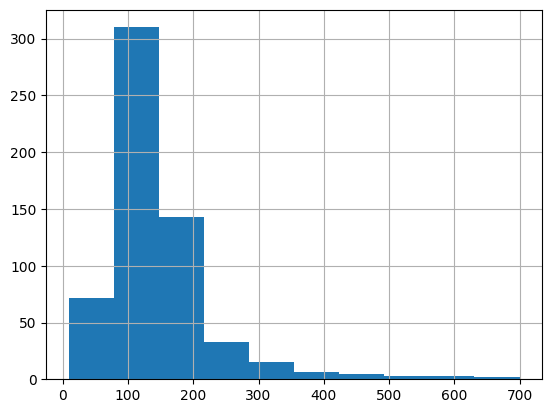

In [19]:
data['LoanAmount'].hist()

In [ ]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

In [20]:
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=np.median(data.LoanAmount.dropna(axis=0))

In [21]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

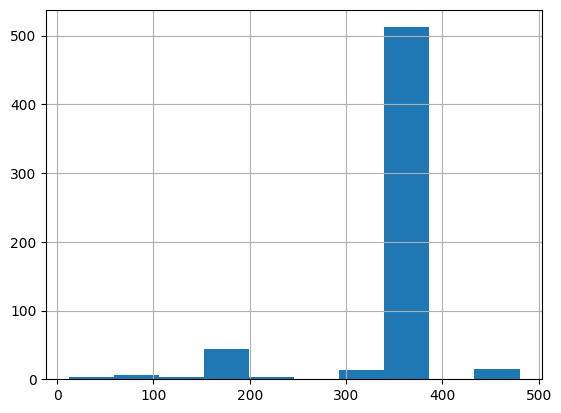

In [22]:
data['Loan_Amount_Term'].hist()

In [23]:
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data.Loan_Amount_Term.dropna(axis=0))

In [24]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [25]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']='1.0'

In [26]:
data.rename(columns={"Loan_Status (Approved)":"Loan_Status"},inplace=True)

In [27]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
#Using label encoding convert the categorical data into numerical data
# Ordinal Data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.Married=lc.fit_transform(data.Married)
data.Education=lc.fit_transform(data.Education)
data.Self_Employed=lc.fit_transform(data.Self_Employed)
data.Property_Area=lc.fit_transform(data.Property_Area)
data.Loan_Status=lc.fit_transform(data.Loan_Status)
data.Loan_ID=lc.fit_transform(data.Loan_ID)

In [29]:
# Nominal Data
#data.Gender=pd.get_dummies(data.Gender,drop_first=True)    
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data['Dependents'] = data['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
#One hot encoding is used here and Drop first means drop the first column it may be female or male

In [30]:
data.Dependents.unique()

array([0, 1, 2, 3])

In [31]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [32]:
from sklearn.preprocessing import MinMaxScaler 
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1
1,1,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,2,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,3,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,4,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


## Feature Selection

In [34]:
corr_data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

<Axes: >

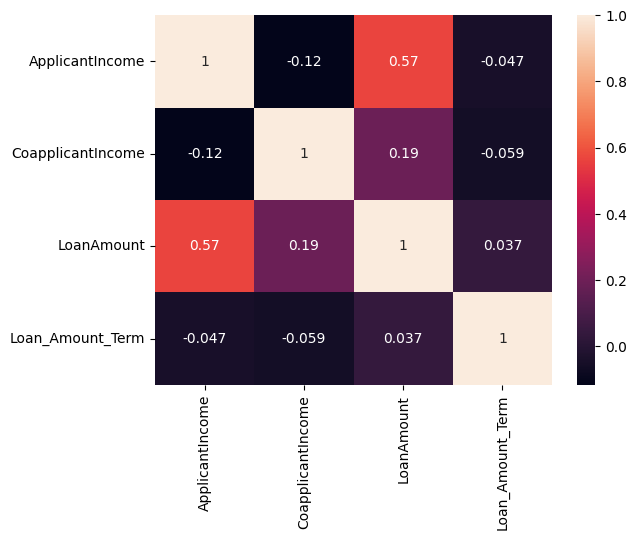

In [35]:
sns.heatmap(corr_data.corr(),annot=True)

In [36]:
# There is very less correlation bet each other

In [37]:
corr_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005
std,0.075560,0.070229,0.121718,0.137668
min,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590
50%,0.045300,0.028524,0.172214,0.743590
75%,0.069821,0.055134,0.225398,0.743590
max,1.000000,1.000000,1.000000,1.000000


## Model Creation

In [38]:
x=data.iloc[::-1]
y=data.Loan_Status

In [63]:
# import the training testing data
from sklearn.model_selection import train_test_split
x_test,x_train,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [64]:
x_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
263,263,0,0,0,0,0,0.087199,0.000000,0.160637,0.743590,1.0,0,1
236,236,1,1,0,0,0,0.069215,0.000000,0.356006,0.743590,1.0,2,0
450,450,1,1,2,1,0,0.026704,0.030120,0.167873,0.743590,0.0,0,0
4,4,1,0,0,0,0,0.072356,0.000000,0.191027,0.743590,1.0,2,1
481,481,1,1,3,1,0,0.036425,0.000000,0.150507,0.743590,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,456,1,1,0,0,0,0.051342,0.000000,0.157742,0.743590,1.0,2,1
376,376,1,1,3,0,0,0.106370,0.119903,0.175109,0.743590,1.0,0,1
25,25,1,1,0,0,1,0.116388,0.000000,0.263386,0.743590,1.0,1,1
438,438,1,0,0,0,1,0.126976,0.000000,0.257598,0.743590,0.0,2,0


In [65]:
x_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
107,107,1,0,0,1,0,0.088844,0.000000,0.160637,0.74359,1.0,0,0
419,419,1,1,0,0,0,0.038293,0.034008,0.186686,0.74359,1.0,1,1
96,96,0,1,0,0,0,0.028868,0.055248,0.185239,0.74359,1.0,1,1
278,278,1,1,0,0,0,0.178516,0.000000,0.617945,0.74359,1.0,1,1
21,21,1,1,1,0,0,0.071800,0.134999,0.442836,0.74359,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,542,0,0,1,0,0,0.043315,0.000000,0.124457,0.74359,1.0,1,1
507,507,1,0,0,0,0,0.042461,0.000000,0.125904,0.74359,1.0,2,0
343,343,1,1,3,1,0,0.037390,0.000000,0.094067,0.74359,1.0,1,1
178,178,1,1,1,0,0,0.044527,0.000000,0.154848,0.74359,1.0,1,1


In [66]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [67]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.070489,0.000000,0.172214,0.743590,1.0,2,1
1,1,1,1,1,0,0,0.054830,0.036192,0.172214,0.743590,1.0,0,0
2,2,1,1,0,0,1,0.035250,0.000000,0.082489,0.743590,1.0,2,1
3,3,1,1,0,1,0,0.030093,0.056592,0.160637,0.743590,1.0,2,1
4,4,1,0,0,0,0,0.072356,0.000000,0.191027,0.743590,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0.034014,0.000000,0.089725,0.743590,1.0,0,1
610,610,1,1,3,0,0,0.048930,0.000000,0.044863,0.358974,1.0,0,1
611,611,1,1,1,0,0,0.097984,0.005760,0.353111,0.743590,1.0,2,1
612,612,1,1,2,0,0,0.091936,0.000000,0.257598,0.743590,1.0,2,1


In [68]:
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [71]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 215, 0: 92})
Counter({1: 207, 0: 100})


In [69]:
from sklearn.svm import SVC
svclassifier =SVC()
svclassifier.fit(x_train,y_train)

SVC()

In [72]:
# Predict the output 
y_pred=svclassifier.predict(x_train)

In [73]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [74]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
157    1
237    1
588    1
175    1
515    1
Name: Loan_Status, Length: 307, dtype: int64

In [76]:
# Model performance
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score,classification_report
accuracy_score(y_test,y_pred)

0.6742671009771987

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.67      1.00      0.81       207

    accuracy                           0.67       307
   macro avg       0.34      0.50      0.40       307
weighted avg       0.45      0.67      0.54       307



In [80]:
# Check cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,x,y,scoring='f1')
print(scores)
print("cross_validation_score:",scores.mean())
print("std:",scores.std())
# std of < 0.05 is good 

[0.81730769 0.81730769 0.8115942  0.8115942  0.81553398]
cross_validation_score: 0.814667554199002
std: 0.00259161453831203
